# 0. Setup Paths

In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !sudo apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [ ]:
!pip install tensorflow tensorflow-gpu==2.4.1 --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
!pip install Pillow

In [14]:
import object_detection

In [ ]:
!pip list

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-11-06 16:55:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.200.48, 2a00:1450:4009:823::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.200.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  23.3MB/s    in 0.8s    

2021-11-06 16:55:04 (23.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

# 2. Create Label Map

In [16]:
labels = [{'name':'licence', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [17]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.67 KiB | 2.67 MiB/s, done.


In [19]:
!pip install pytz

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [21]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [22]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2021-11-06 17:32:18.161602: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2021-11-06 17:32:18.161648: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

In [23]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [24]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [25]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [26]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [27]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [28]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [31]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [32]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [40]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [68]:
gpus = tf.config.list_physical_devices('GPU')

In [70]:
if gpus: 
    print('yes')
else: 
    print('no')

no


In [71]:
# Prevent GPU complete consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)



In [72]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [73]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [89]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'uk_car.jpg')

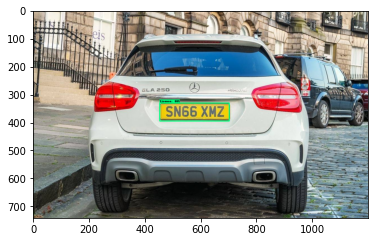

In [90]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Apply OCR to Detection

In [77]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 6.9 MB/s            6.9 MB/s eta 0:00:05
     |███████████████████▉            | 546.6 MB 140.4 MB/s eta 0:00:03/s eta 0:00:23MB/s eta 0:00:05

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████▎         | 614.6 MB 106.3 MB/s eta 0:00:03

     |██████████████████████▌         | 619.3 MB 106.3 MB/s eta 0:00:03

     |██████████████████████▋         | 624.5 MB 106.3 MB/s eta 0:00:03

     |██████████████████████▊         | 627.7 MB 106.3 MB/s eta 0:00:03

     |███████████████████████         | 631.2 MB 106.3 MB/s eta 0:00:03

     |███████████████████████         | 635.9 MB 106.3 MB/s eta 0:00:03

     |███████████████████████▎        | 640.2 MB 106.3 MB/s eta 0:00:03

     |███████████████████████▍        | 645.0 MB 106.3 MB/s eta 0:00:03

     |███████████████████████▋        | 649.5 MB 106.3 MB/s eta 0:00:03

     |███████████████████████▊        | 652.8 MB 106.3 MB/s eta 0:00:03

     |███████████████████████▉        | 657.4 MB 106.3 MB/s eta 0:00:03

     |████████████████████████        | 661.7 MB 106.3 MB/s eta 0:00:03

     |████████████████████████▏       | 665.5 MB 106.3 MB/s eta 0:00:03

     |████████████████████████▎       | 669.9 MB 106.3 MB/s eta 0:00:02

     |████████████████████████▌       | 675.2 MB 106.3 MB/s eta 0:00:02

     |████████████████████████▊       | 680.5 MB 106.3 MB/s eta 0:00:02

     |████████████████████████▉       | 685.5 MB 114.3 MB/s eta 0:00:02

     |█████████████████████████       | 691.0 MB 114.3 MB/s eta 0:00:02

     |█████████████████████████▎      | 696.8 MB 114.3 MB/s eta 0:00:02

     |█████████████████████████▌      | 701.9 MB 114.3 MB/s eta 0:00:02

     |█████████████████████████▋      | 706.5 MB 114.3 MB/s eta 0:00:02

     |█████████████████████████▉      | 711.1 MB 114.3 MB/s eta 0:00:02

     |██████████████████████████      | 715.1 MB 114.3 MB/s eta 0:00:02

     |██████████████████████████▏     | 719.7 MB 114.3 MB/s eta 0:00:02

     |██████████████████████████▎     | 725.4 MB 114.3 MB/s eta 0:00:02

     |██████████████████████████▌     | 730.6 MB 114.3 MB/s eta 0:00:02

     |██████████████████████████████▋ | 844.9 MB 22.4 MB/s eta 0:00:02 MB/s eta 0:00:02��███    | 768.8 MB 114.3 MB/s eta 0:00:01��████████████████████████▌  | 811.7 MB 22.4 MB/s eta 0:00:04 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 881.9 MB 4.6 kB/s              
     |████████████████████████████████| 23.3 MB 37.0 MB/s            �███████████▋      | 18.6 MB 37.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 42.1 MB/s            
     |████████████████████████████████| 30.2 MB 99.8 MB/s            
     |████████████████████████████████| 6.3 MB 108.2 MB/s            
     |████████████████████████████████| 178 kB 101.6 MB/s            
     |████████████████████████████████| 3.3 MB 21.9 MB/s            
     |████████████████████████████████| 1.9 MB 38.2 MB/s            
     |████████████████████████████████| 3.3 MB 43.2 MB/s            
     |████████████████████████████████| 3.3 MB 30.2 MB/s            
     |████████████████████████████████| 3.3 MB 59.1 MB/s            
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver

In [78]:
!pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |████████████████████████████████| 199.3 MB 101.6 MB/s            ta 0:00:01
     |████████████████████████████████| 16.2 MB 41.7 MB/s            
     |████████████████████████████████| 2.7 MB 25.0 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1
    Uninstalling torchvision-0.11.1:
      Successfully uninstalled torchvision-0.11.1


In [79]:
import easyocr

In [82]:
detection_threshold = 0.7

In [92]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [93]:
detections['detection_scores']

array([0.88106406, 0.24289861, 0.16213411, 0.15940261, 0.13804933,
       0.11538681, 0.08714351, 0.0855504 , 0.07273418, 0.0714395 ,
       0.07095632, 0.06518662, 0.0650703 , 0.06430632, 0.06358984,
       0.0576382 , 0.05760226, 0.0535638 , 0.05061084, 0.04960939,
       0.04727831, 0.04710865, 0.04643703, 0.04430115, 0.0432409 ,
       0.04305479, 0.04215539, 0.04126889, 0.03958917, 0.03951672,
       0.0384689 , 0.03840902, 0.0368596 , 0.0359897 , 0.03561431,
       0.03537396, 0.03459162, 0.03456837, 0.03441548, 0.0332523 ,
       0.03264901, 0.032536  , 0.03239989, 0.03221929, 0.03141981,
       0.03114489, 0.03053412, 0.03041723, 0.03037652, 0.0301058 ,
       0.02947849, 0.02900678, 0.02894929, 0.02888641, 0.02878845,
       0.02876979, 0.02870882, 0.02850932, 0.02831167, 0.02775896,
       0.02761173, 0.0274764 , 0.0272505 , 0.02692661, 0.02691355,
       0.02668056, 0.02665955, 0.02636799, 0.02634004, 0.0261597 ,
       0.02614033, 0.02582693, 0.02571821, 0.02554962, 0.02546

In [94]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.44804442 0.37772354 0.5336033  0.58661604]
[332.44895911 453.2682538  395.93365645 703.93924713]
[([[18, 4], [240, 4], [240, 58], [18, 58]], 'SN66 XMZ', 0.8657252044691898)]


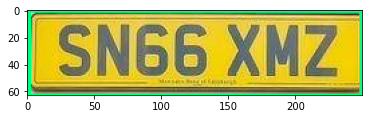

In [95]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))



In [96]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

54
SN66 XMZ


# OCR Filtering

In [97]:
region_threshold = 0.05

In [98]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate



In [99]:
filter_text(region, ocr_result, region_threshold)

['SN66 XMZ']

# Bring it Together

In [100]:
region_threshold = 0.6

In [101]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


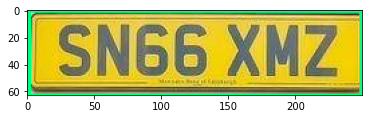

['SN66 XMZ']


In [102]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# Save Results

In [103]:
import csv
import uuid

In [104]:
'{}.jpg'.format(uuid.uuid1())

'70b55d88-441c-11ec-b9e6-b5b4ee933adc.jpg'

In [105]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [107]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

In [108]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.4.58
Uninstalling opencv-python-headless-4.5.4.58:
  Successfully uninstalled opencv-python-headless-4.5.4.58


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


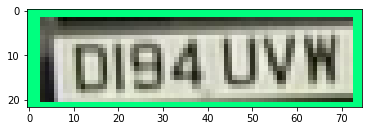

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['diga uvW']


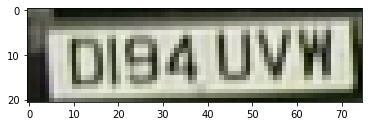

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di94 uvW']


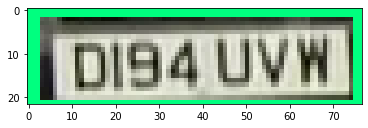

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di94 Uvw']


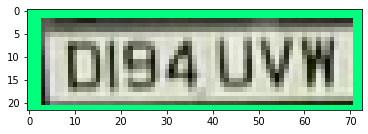

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dioauvh']


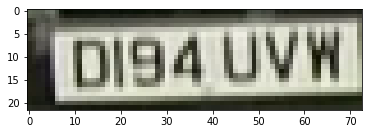

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['diqauvw']


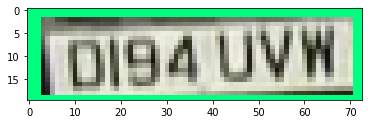

['@dIs4 U']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


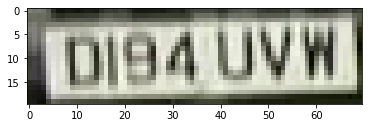

['[dibauvW']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


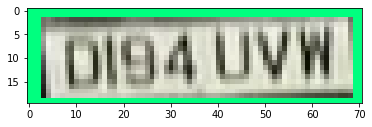

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['VI44 UvW']


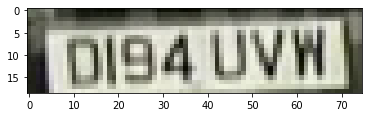

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Ipig4 uvw']


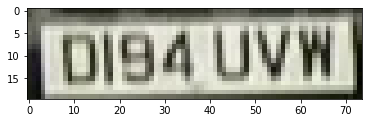

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['10i94 UvW']


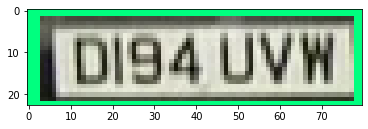

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['disa uVH']


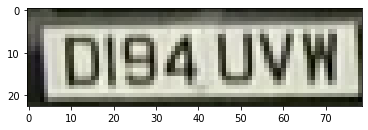

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UvH']


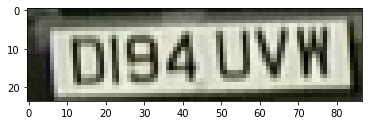

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['@dg4uvw']


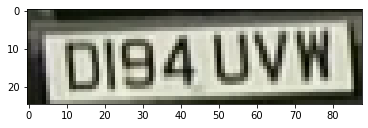

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Idigauw']


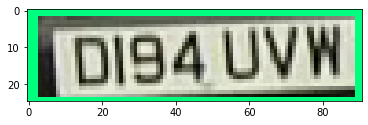

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['digauVW']


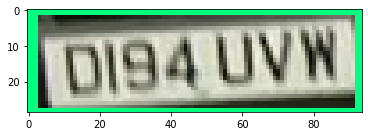

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0194 UVW']


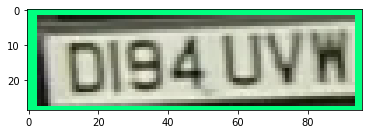

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['d4WD']


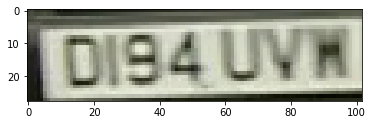

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['D']


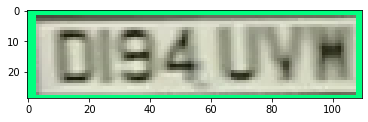

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DBAIL']


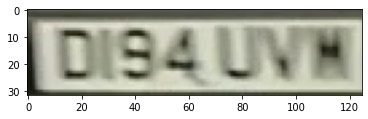

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


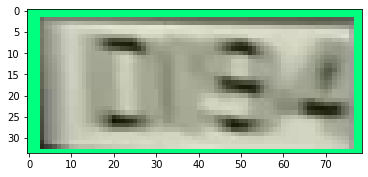

[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


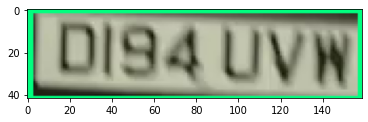

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DIA4UVW']


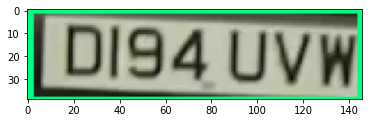

['DI94 UVH']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


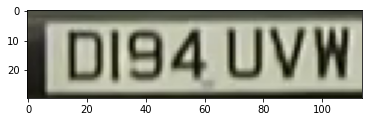

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


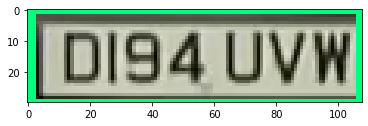

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


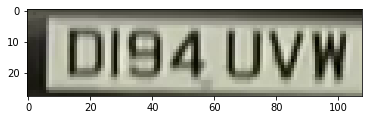

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UvW']


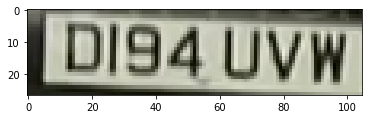

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


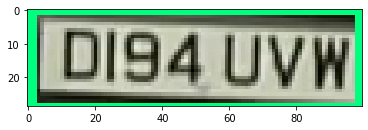

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


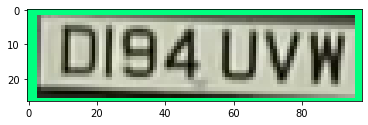

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di9A UVW']


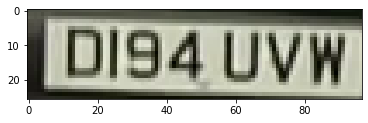

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVM']


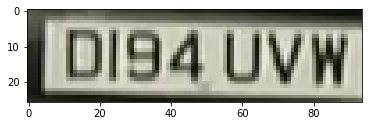

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVW']


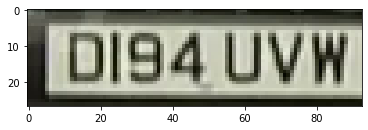

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVM']


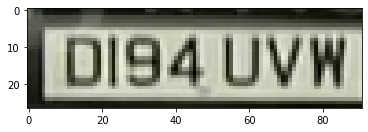

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dig4uVW']


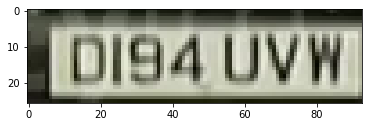

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di9A UvMI']


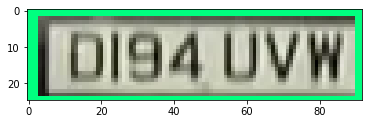

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI9a UvM']


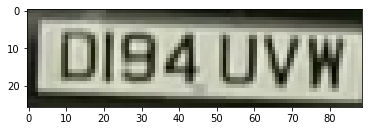

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['@i94 UVK']


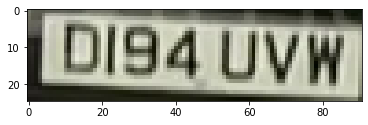

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['[Di94 UVW']


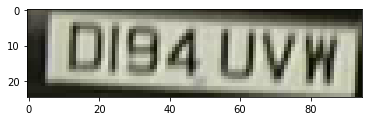

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94 UvWI']


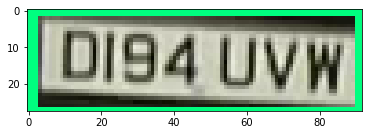

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94UVW']


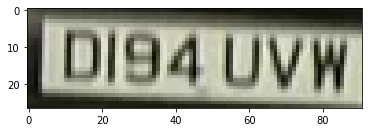

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DJA UVW']


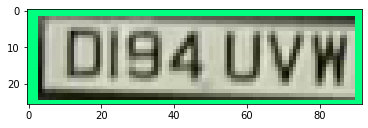

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94UVM']


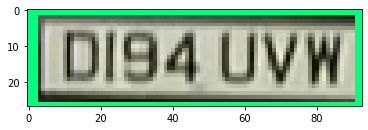

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UvM']


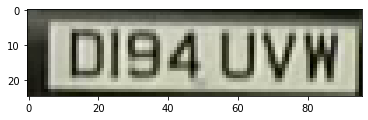

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


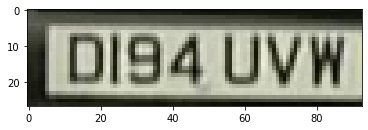

['di94 uVW']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


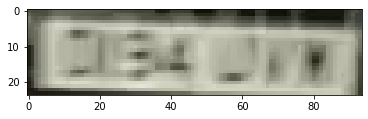

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


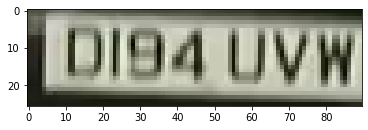

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['QV4 UVW']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


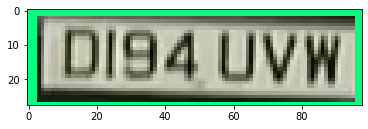

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UvW']


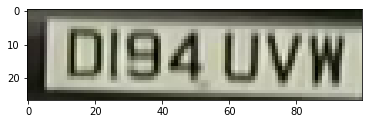

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


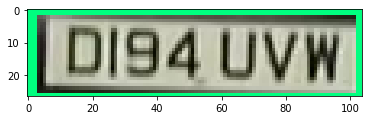

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


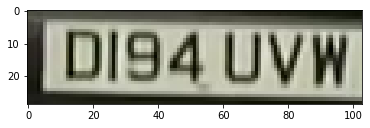

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94 UVW']


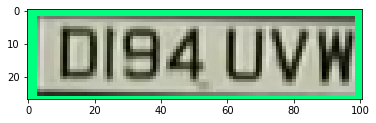

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9A UVW']


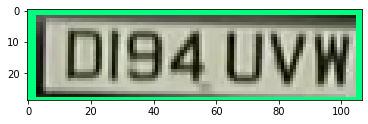

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVW']


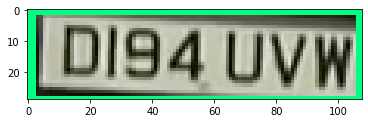

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVW']


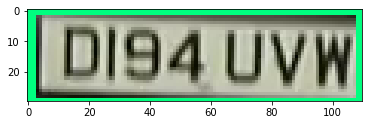

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


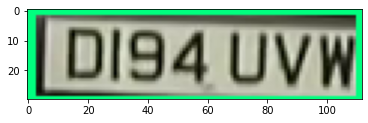

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVW']


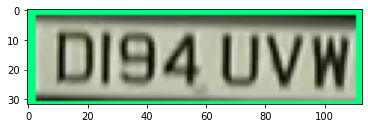

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI9A UVW']


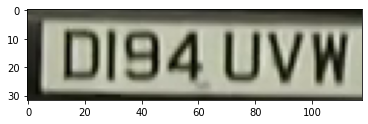

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


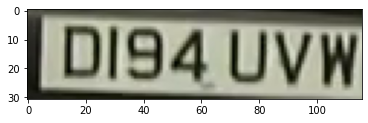

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94UVW']


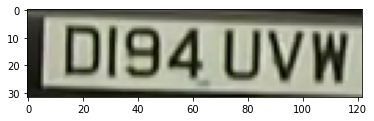

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


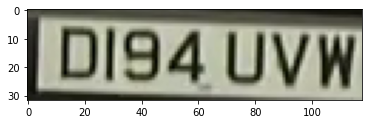

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


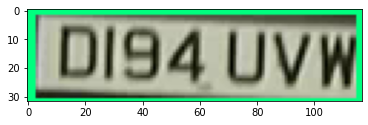

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


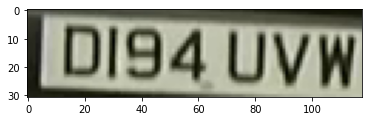

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


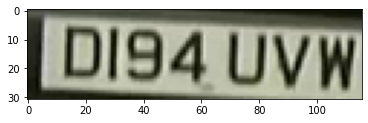

['Di94 UVW']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


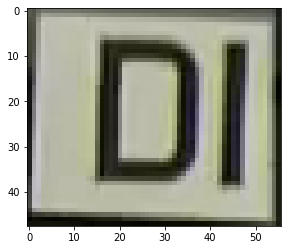

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


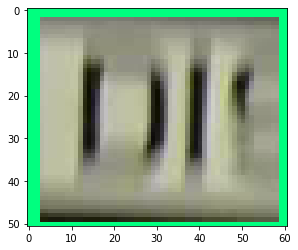

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


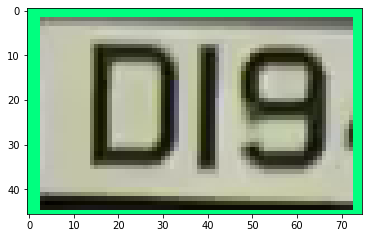

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di9']


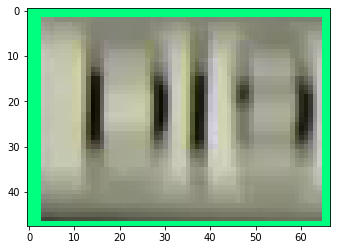

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


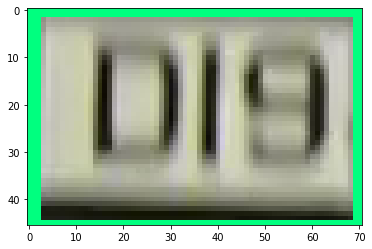

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


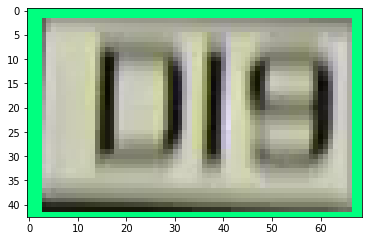

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


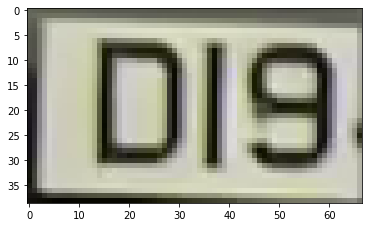

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di9-']


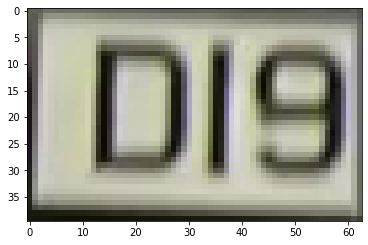

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Dig']


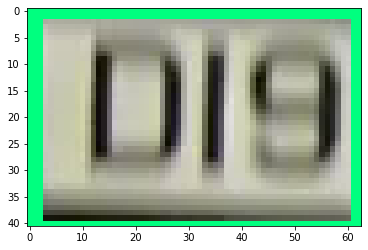

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


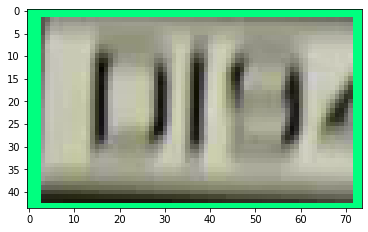

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


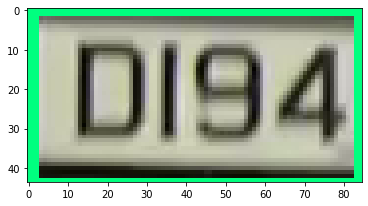

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DiI94']


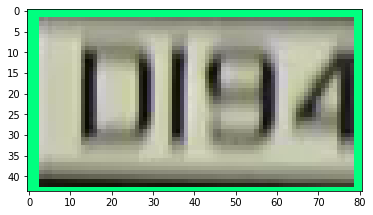

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


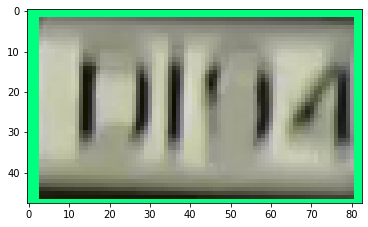

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


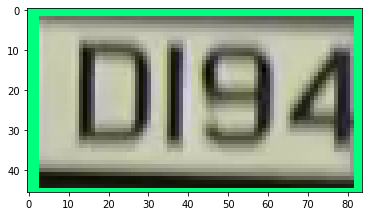

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


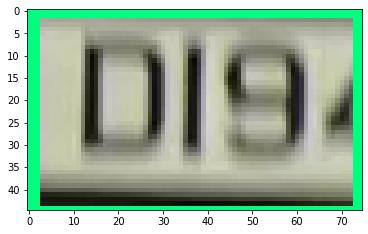

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


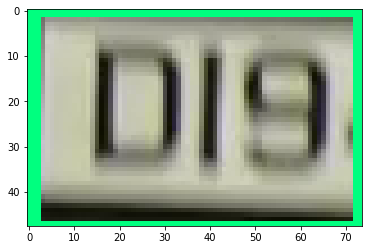

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


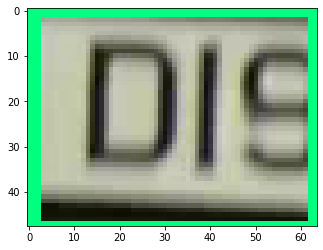

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Dic']


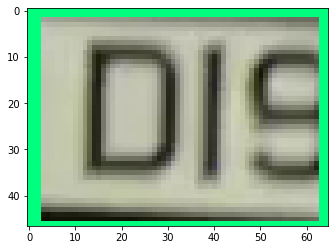

['diS']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


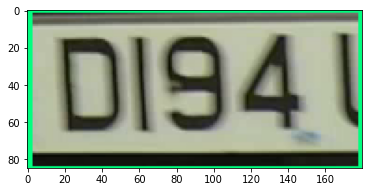

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 (']


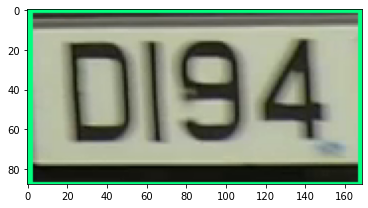

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0I94']


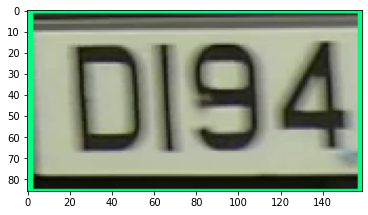

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94']


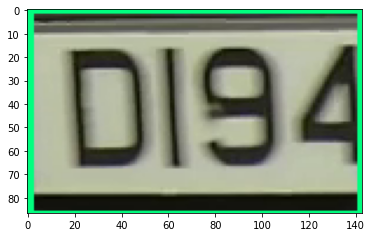

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94']


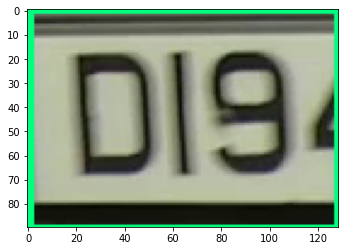

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI9']


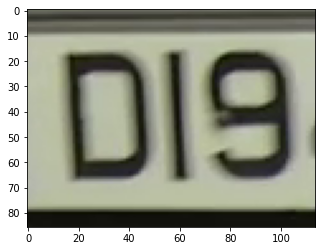

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9']


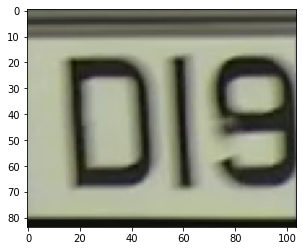

['DI9']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


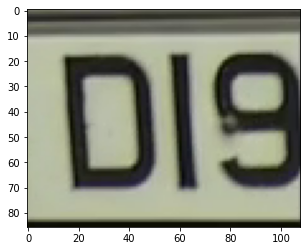

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di?']


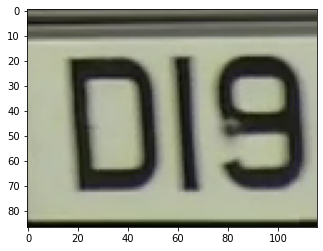

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9']


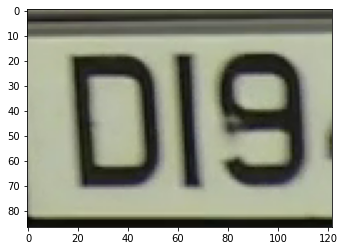

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI9']


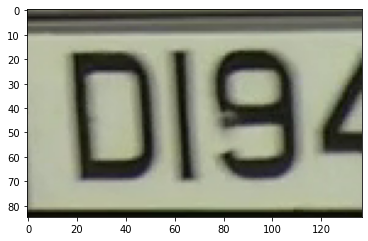

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9-']


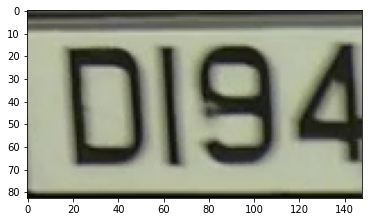

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94']


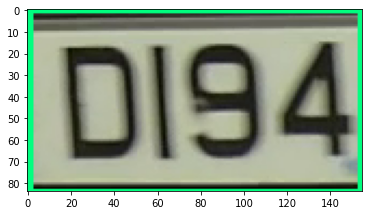

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94']


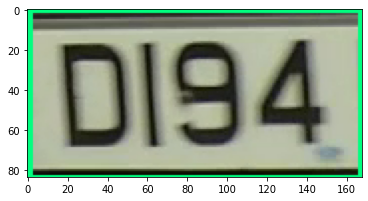

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94']


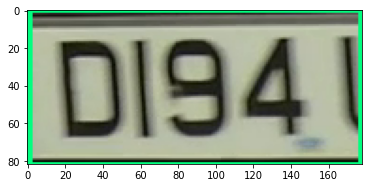

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94']


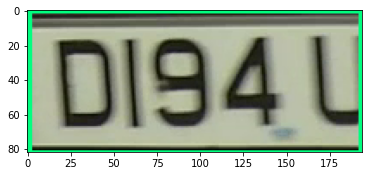

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 L']


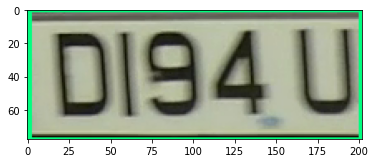

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94 U']


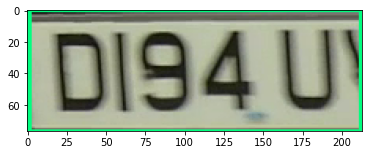

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94U']


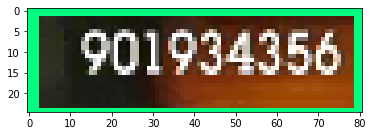

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


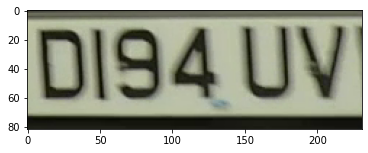

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['DI94 UV']


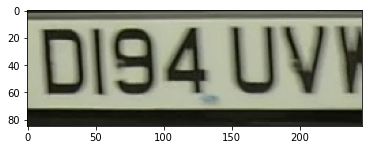

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di94WVT']


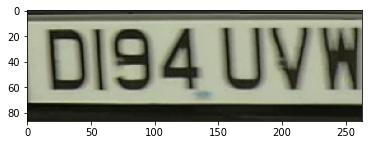

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9a WV']


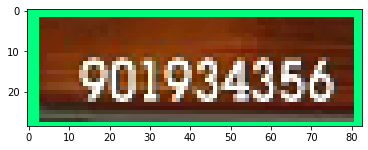

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


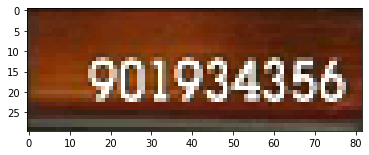

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


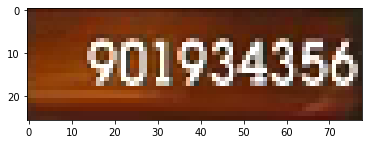

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


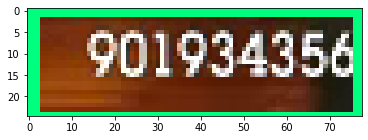

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


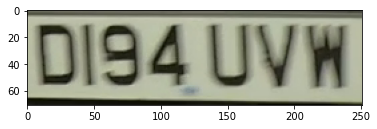

['di9auvR']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


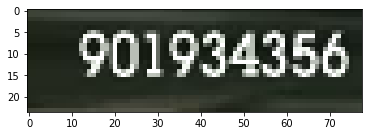

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


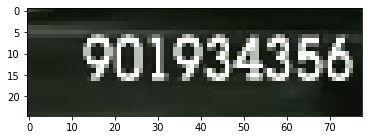

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


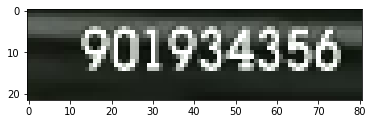

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['901934356']


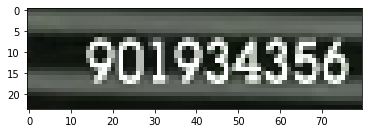

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


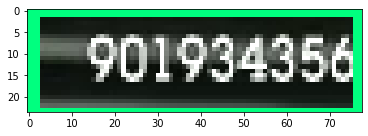

[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


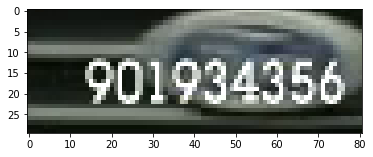

[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


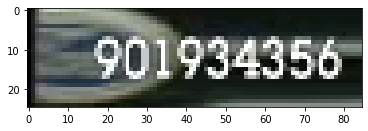

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


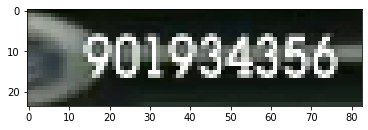

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


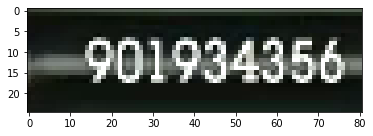

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


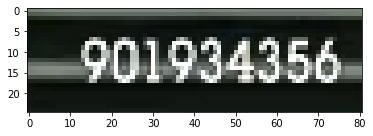

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


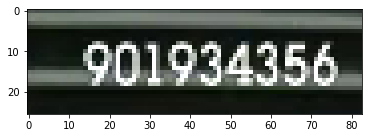

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


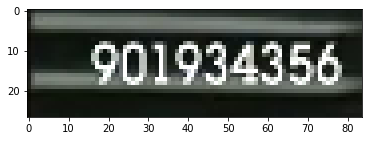

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


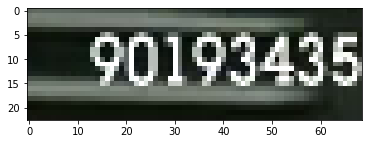

[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


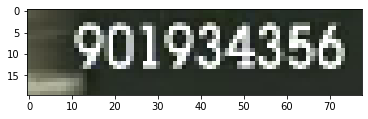

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['901934356']


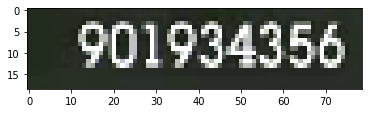

['901934356']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


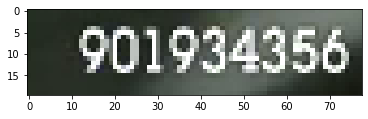

['901934356']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


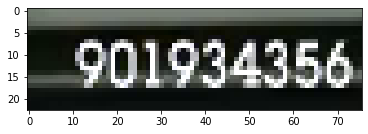

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['901934356']


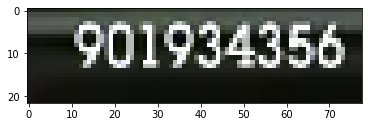

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['901934356']


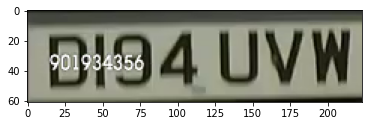

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


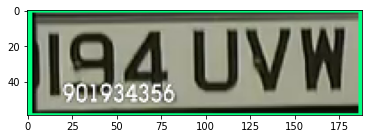

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['I94 UVW']


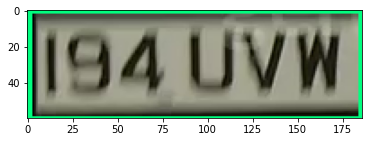

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['19a UVM']


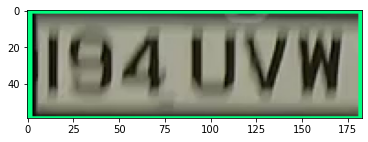

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MraMVW']


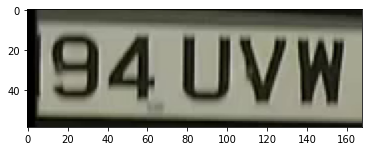

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['[94 UVW']


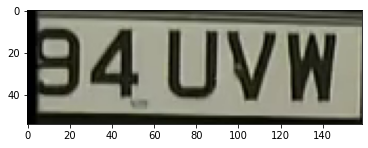

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['94UVW']


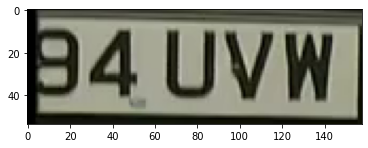

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['94 UVW']


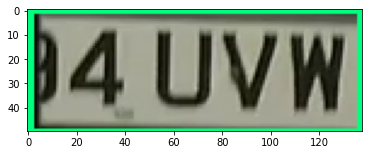

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['14 UVM']


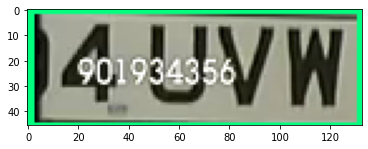

['GO19UL88V/ W']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


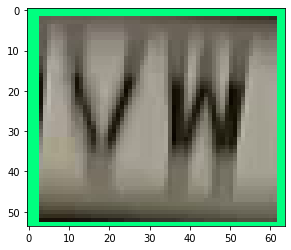

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


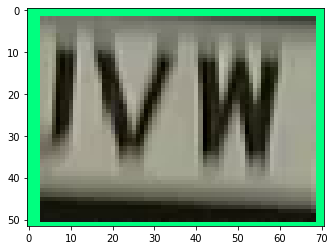

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['IVW']


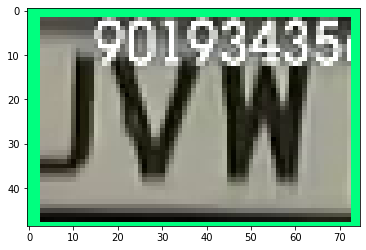

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['JVWS']


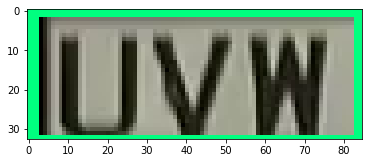

['Iuvw']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


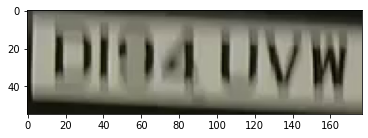

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


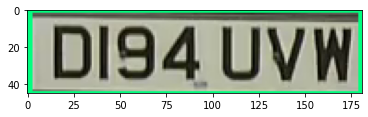

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVW']


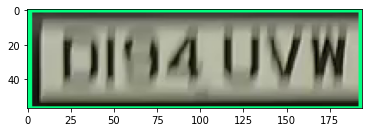

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


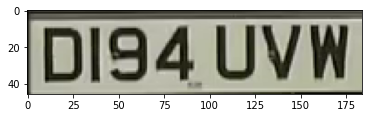

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di94 UM']


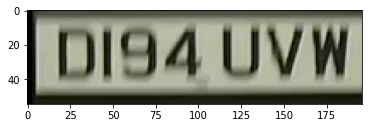

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['TI9A UVW']


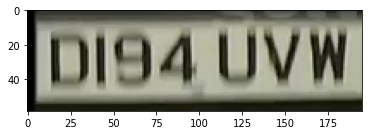

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['II4A UVW']


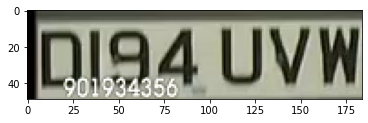

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UVM']


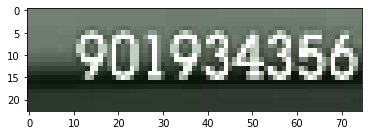

['901934356']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


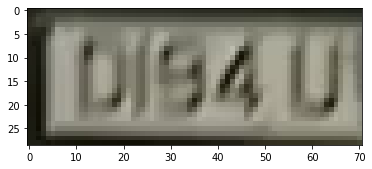

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['WiyaU']


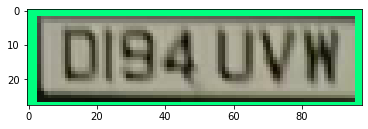

['diaauw']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


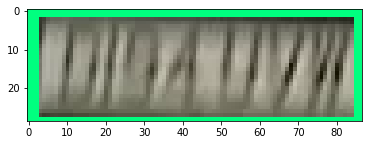

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


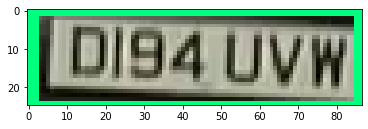

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di9aUVW']


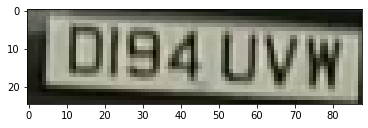

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['di9auvH']


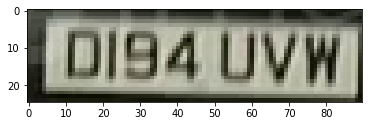

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UvMI']


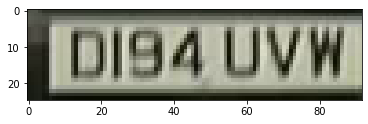

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dgA UvM']


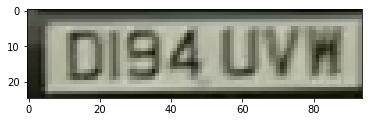

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['@94n']


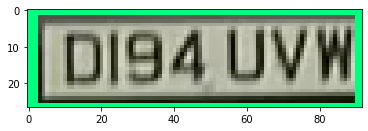

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['dig4 UVM']


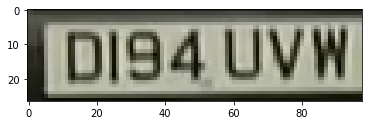

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['digauvw']


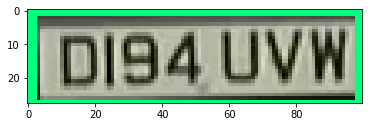

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['0i94 UVW']


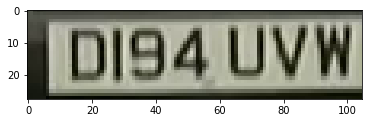

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Di94 UvW']


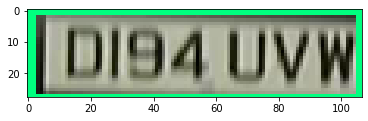

['VVA UVW']


ValueError: in user code:

    /tmp/ipykernel_202838/1007919961.py:11 detect_fn  *
        image, shapes = detection_model.preprocess(image)
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/object_detection/meta_architectures/ssd_meta_arch.py:484 preprocess  *
        normalized_inputs, self._image_resizer_fn)
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/object_detection/utils/shape_utils.py:492 resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/object_detection/utils/shape_utils.py:246 static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/object_detection/core/preprocessor.py:3327 resize_image  *
        new_image = tf.image.resize_images(
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow/python/ops/image_ops_impl.py:1462 resize_images
        return _resize_images_common(
    /home/ubuntu/Downloads/Image_Recognition/TFODCourse/tfod/lib/python3.8/site-packages/tensorflow/python/ops/image_ops_impl.py:1320 _resize_images_common
        raise ValueError('\'images\' must have either 3 or 4 dimensions.')

    ValueError: 'images' must have either 3 or 4 dimensions.


In [115]:
cap = cv2.VideoCapture('gettyimages-901934356-640_adpp.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')